# Starting Project Analysing Developer Dataset from Stack Overflow 2018-2020

## Importing Necessiries Libraries and Dataset


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
df = pd.read_csv('developer_dataset.csv')

C:\Users\andre\AppData\Local\Temp\ipykernel_4632\3840308037.py:8: DtypeWarning: Columns (18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('developer_dataset.csv')


## Cleaning Data, dropping columns with 60 or more missing data

In [16]:
df.drop(["NEWJobHunt","NEWJobHuntResearch", "NEWLearn"],
        axis=1,
        inplace=True)

df[['RespondentID','Country']].groupby('Country').count()

missingData = df[['Employment','DevType']].isnull().groupby(df['Country']).sum().reset_index()

## Plotting Missing Data per Country

C:\Users\andre\AppData\Local\Temp\ipykernel_4632\3988280138.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  A=sns.catplot(
C:\Users\andre\AppData\Local\Temp\ipykernel_4632\3988280138.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  B=sns.catplot(


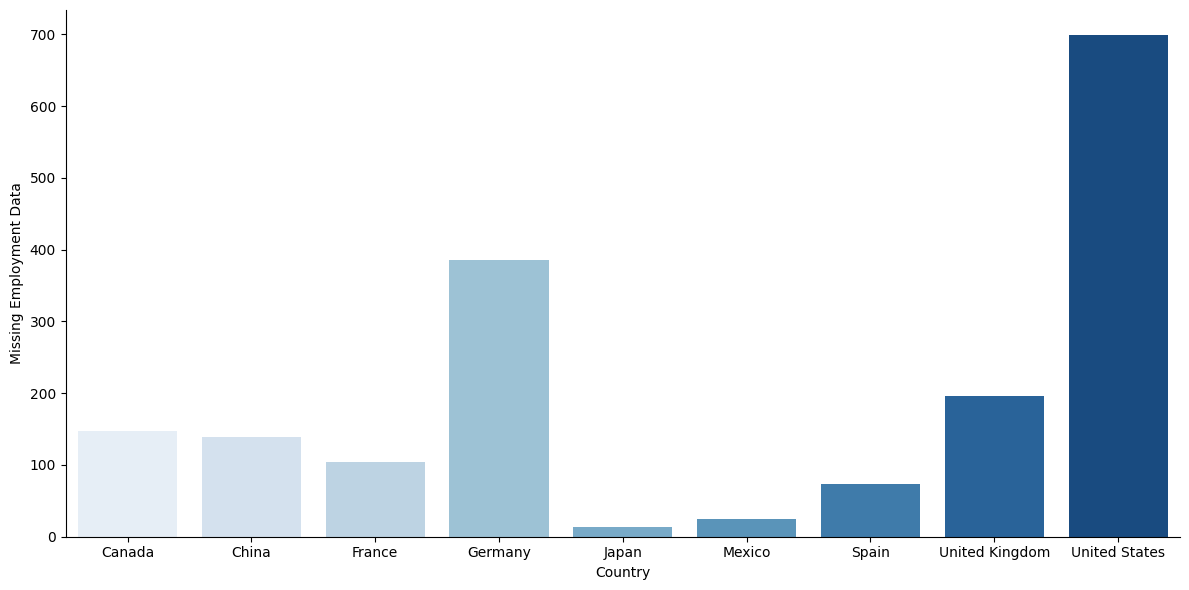

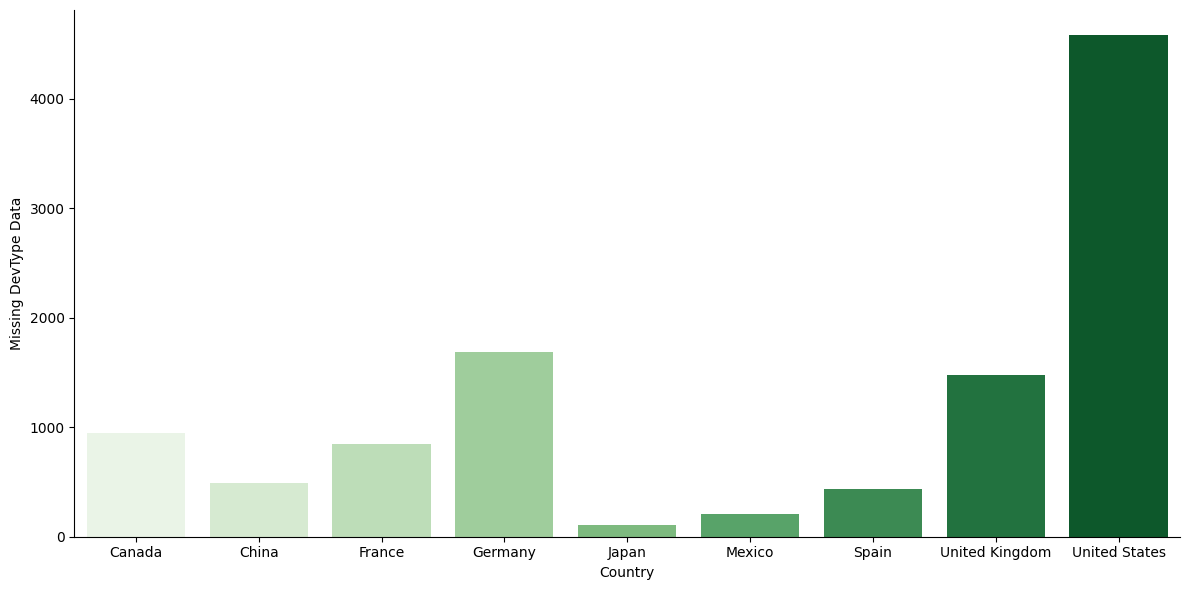

<Figure size 640x480 with 0 Axes>

In [33]:
A=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="Employment",
    height = 6, aspect = 2,
    palette='Blues')
A.set_axis_labels("Country","Missing Employment Data")

B=sns.catplot(
    data=missingData, kind="bar",
    x="Country", y="DevType",
    height = 6, aspect = 2,
    palette="Greens")
B.set_axis_labels("Country","Missing DevType Data")

plt.show()
plt.clf()

## We can see above theres no irregulation in the missing Data

## Cleaning Employment and DevType Columns

In [18]:
df.dropna(subset=['Employment','DevType'],
          inplace=True,
          how='any')

## Plotting Count of Respondents by 'Country' and 'Employment'

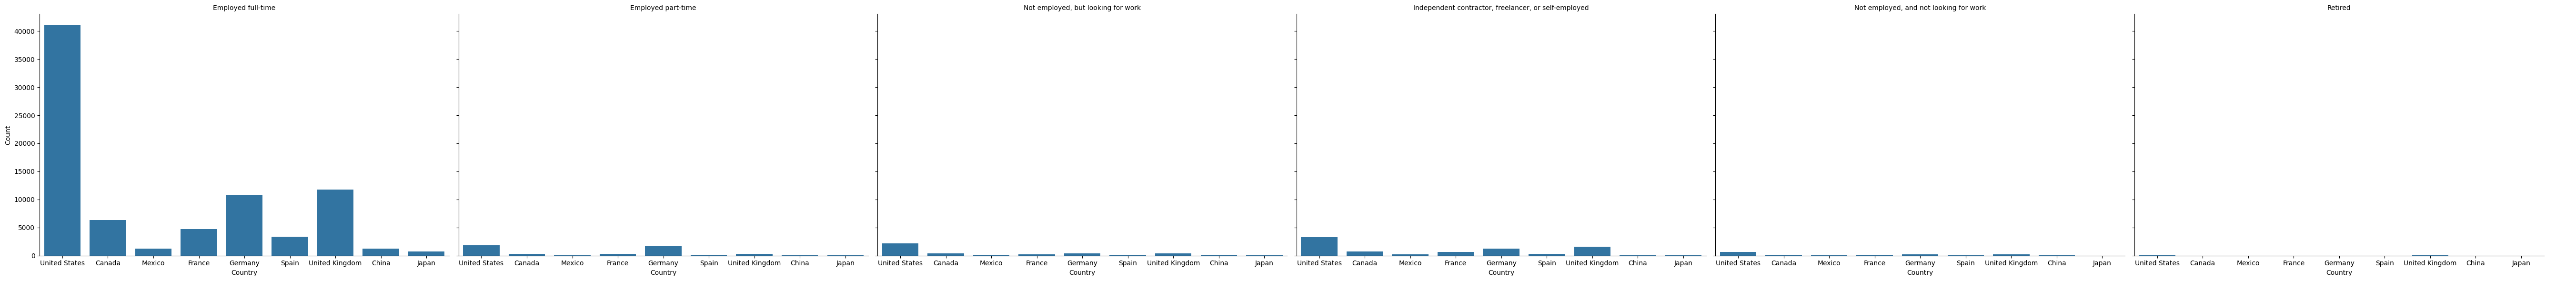

<Figure size 640x480 with 0 Axes>

In [19]:
empfig = sns.catplot(x="Country", col="Employment",
                     data=df, kind='count',
                     height=6, aspect = 1.5)
empfig.set_axis_labels("Country","Count")
empfig.set_titles("{col_name}")
plt.show()
plt.clf()

## Creating a Subset of Data to Analyse Different Roles in Technology

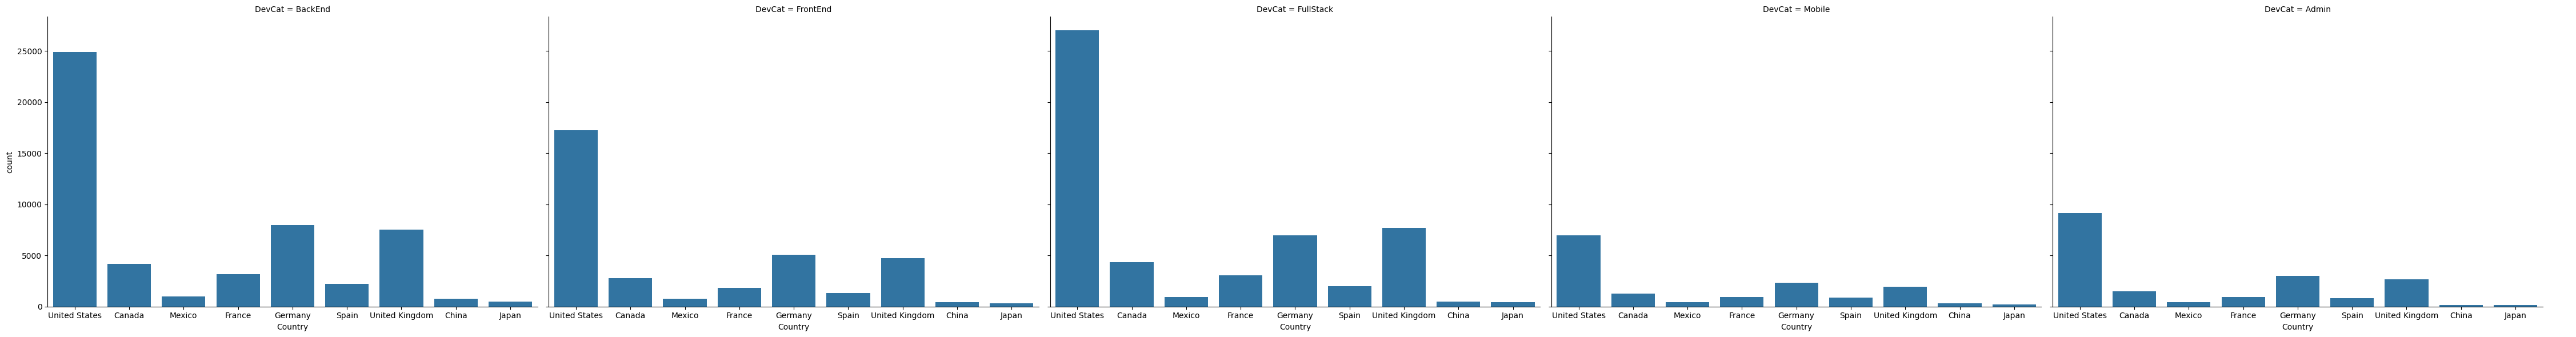

<Figure size 640x480 with 0 Axes>

In [20]:
devdf = df[["Country", "DevType"]].copy()

devdf['BackEnd'] = devdf['DevType'].str.contains('back-end', case=False, na=False)
devdf['FrontEnd'] = devdf['DevType'].str.contains('front-end', case=False, na=False)
devdf['FullStack'] = devdf['DevType'].str.contains('full-stack', case=False, na=False)
devdf['Mobile'] = devdf['DevType'].str.contains('mobile', case=False, na=False)
devdf['Admin'] = devdf['DevType'].str.contains('administrator', case=False, na=False)

devdf = devdf.melt(id_vars=["Country"],
                    value_vars=["BackEnd","FrontEnd","FullStack","Mobile","Admin"],
                    var_name='DevCat',
                    value_name='DevFlag')

devdf = devdf[devdf["DevFlag"]]


devFig = sns.catplot(x="Country", col="DevCat",
                     data=devdf, kind='count',
                     height=6, aspect=1.5)
plt.show()
plt.clf()

## Creating a New DataSet to Analysize Graduation Majors

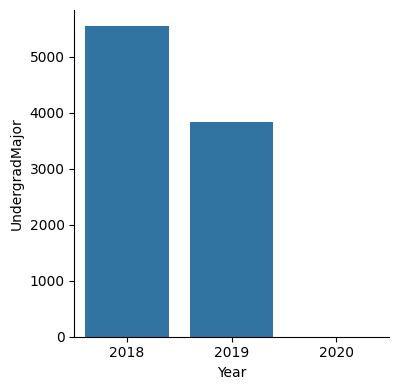

<Figure size 640x480 with 0 Axes>

In [21]:
missingUndergrad = df["UndergradMajor"].isnull().groupby(df["Year"]).sum().reset_index()

sns.catplot(x="Year", y="UndergradMajor",
            data=missingUndergrad, kind="bar",
            height=4, aspect=1)
plt.show()
plt.clf()

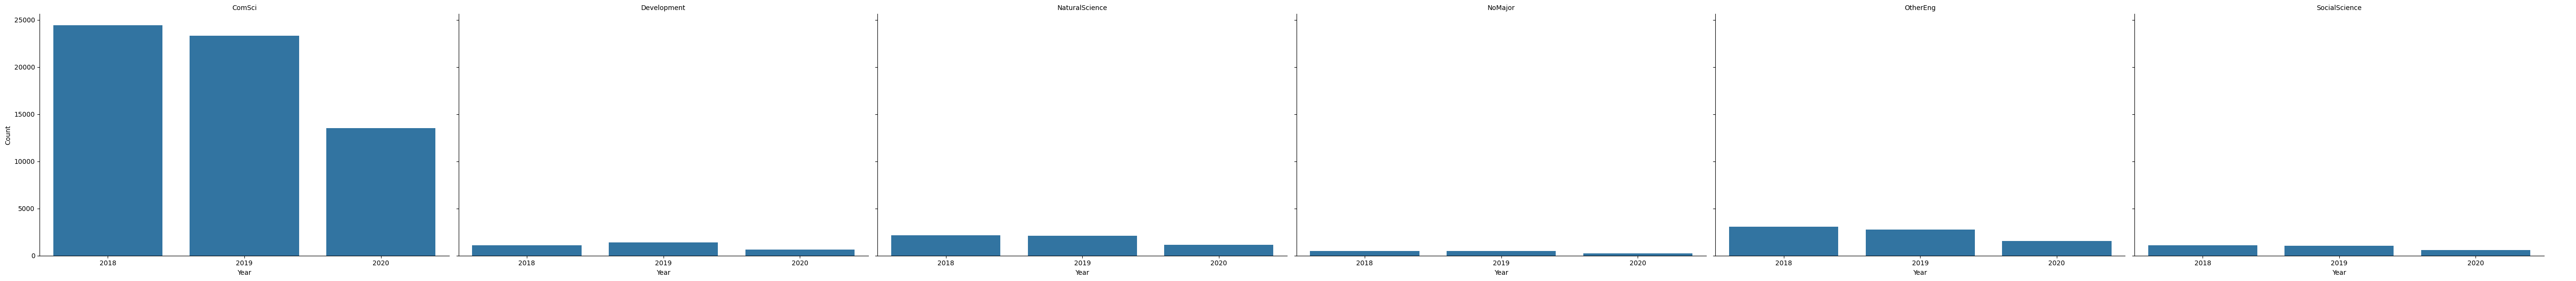

<Figure size 640x480 with 0 Axes>

In [27]:
df = df.sort_values(["RespondentID","Year"])
df["UndergradMajor"].bfill()

# Filtering relevant columns and dropping NaN values
edudf = df[["Year", "UndergradMajor"]].copy()
edudf.dropna(subset=["UndergradMajor"], inplace=True)

# Creating new boolean columns based on 'UndergradMajor'
edudf['SocialScience'] = edudf['UndergradMajor'].str.contains('(?i)social science', case=False, na=False)
edudf['NaturalScience'] = edudf['UndergradMajor'].str.contains('(?i)natural science', case=False, na=False)
edudf['ComSci'] = edudf['UndergradMajor'].str.contains('(?i)computer science', case=False, na=False)
edudf['Development'] = edudf['UndergradMajor'].str.contains('(?i)development', case=False, na=False)
edudf['OtherEng'] = edudf['UndergradMajor'].str.contains('(?i)another engineering', case=False, na=False)
edudf['NoMajor'] = edudf['UndergradMajor'].str.contains('(?i)never declared', case=False, na=False)

# Melting the DataFrame for plotting
edudf = edudf.melt(id_vars=['Year'],
                   value_vars=['SocialScience', 'NaturalScience', 'ComSci', 'Development', 'OtherEng', 'NoMajor'],
                   var_name='EduCat',
                   value_name='EduFlag')

# Filtering rows where 'EduFlag' is True
edudf = edudf[edudf['EduFlag']]

# Grouping and counting the number of occurrences
edudf = edudf.groupby(['Year', 'EduCat']).size().reset_index(name='EduFlag')

# Plotting the data
eduFig = sns.catplot(x='Year', y='EduFlag', col='EduCat',
                     data=edudf, kind='bar',
                     height=6, aspect=1.5)
eduFig.set_axis_labels("Year", "Count")
eduFig.set_titles("{col_name}")

# Showing the plot
plt.show()
plt.clf()

## Analysing Years of Coding in our DataSet

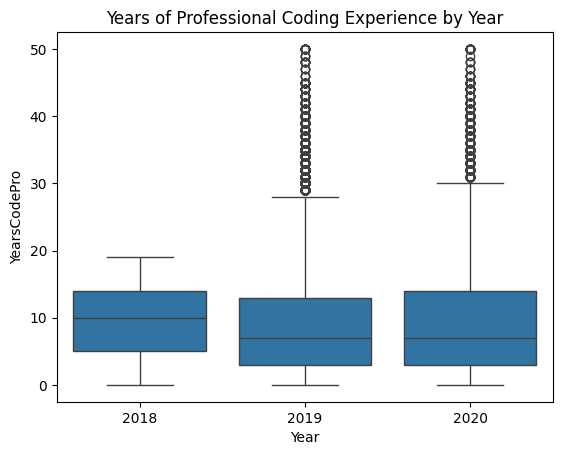

<Figure size 640x480 with 0 Axes>

In [25]:
compFields = df[["Year", "YearsCodePro", "ConvertedComp"]]

# Plot for YearsCodePro
D = sns.boxplot(x="Year", y="YearsCodePro", data=compFields)
plt.title("Years of Professional Coding Experience by Year")
plt.show()
plt.clf()


## Plotting Remuneration based in Years of Coding

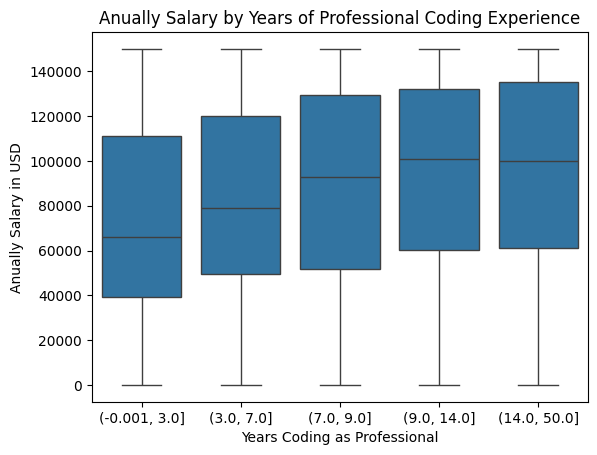

<Figure size 640x480 with 0 Axes>

In [28]:
imputedf = df[["YearsCodePro", "ConvertedComp"]]

traindf, testdf = train_test_split(imputedf, train_size=0.1, random_state=0)

imp = IterativeImputer(max_iter=20, random_state=0)
imp.fit(imputedf)

compdf = pd.DataFrame(np.round(imp.transform(imputedf), 0), columns=["YearsCodePro", "ConvertedComp"])

compPlotdf = compdf[compdf['ConvertedComp'] <= 150000].copy()

compPlotdf.loc[:, 'CodeYearBins'] = pd.qcut(compPlotdf['YearsCodePro'], q=5)

ax = sns.boxplot(x="CodeYearBins", y="ConvertedComp", data=compPlotdf)
plt.title("Anually Salary by Years of Professional Coding Experience")
ax.set_xlabel("Years Coding as Professional")
ax.set_ylabel("Anually Salary in USD")
plt.show()
plt.clf()